<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
import wget

URL = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"

file = wget.download(URL)

100% [..............................................................................] 23101 / 23101

### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [8]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

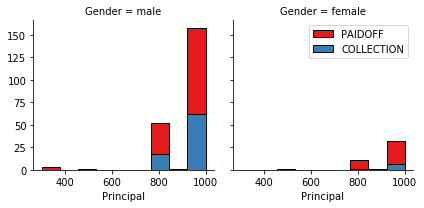

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

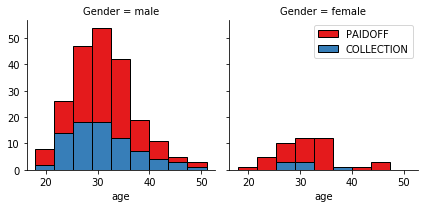

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

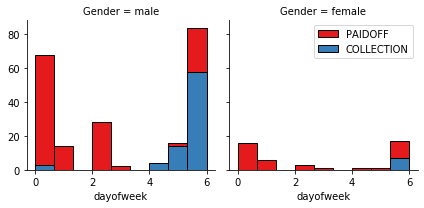

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender','loan_status'])["loan_status"].value_counts()

Gender  loan_status  loan_status
female  COLLECTION   COLLECTION       7
        PAIDOFF      PAIDOFF         45
male    COLLECTION   COLLECTION      79
        PAIDOFF      PAIDOFF        215
Name: loan_status, dtype: int64

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001979B6426C8>,
      dtype=object)

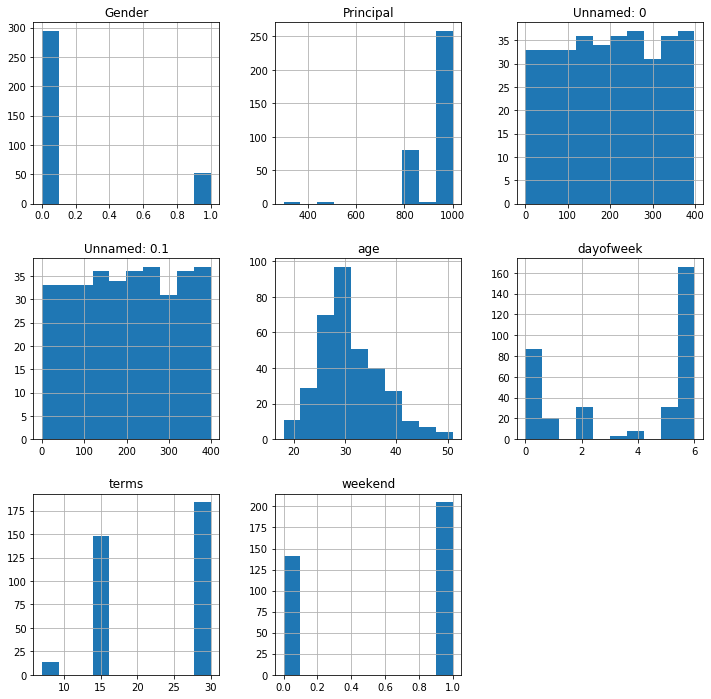

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl

df.hist(figsize=(12,12))

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

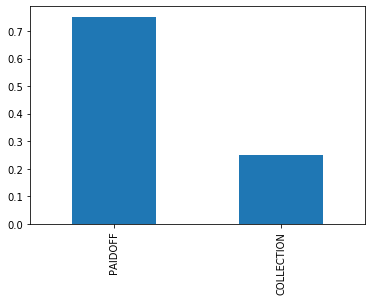

In [23]:
loan = df["loan_status"].value_counts(normalize=True)

loan.plot(kind="bar");
loan

### Aspectos a tener en cuenta

#### Normalización o estandarización
- Vamos a trabajar con algoritmos de distancia, así que la normalización o la estandarización de los datos es necesaria. Vamos a estandarizar los datos a una media = 0 y desviación típica = 1, el equivalente a una normal Gaussiana, mediante el uso de `StandardScaler()` de sklearn
- La estandarización o normalización hay que hacerla posteriormente al train_test_split. Hay que tener en cuenta que el objetivo es que el set train no tenga influencia del de test.

#### Tamaño del dataset
- La variable dependiente está bastante desequilibrado y COLLECTION tiene un peso de alrededor el 25% y PAIDOFF del 75%. Hay que tener en cuenta el problema que seupone trabajar con datos desbalanceados, como se muestra en el siguiente [artículo](https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/). Algunas soluciones son:
    - Penalización para compensar / Métricas
    - Resampling y Muestras sintéticas
    - subsampling
    - oversamplig
    - combinación de oversampling + subsampling
    - Balanced Ensemble

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

We should normalize the training set and then use the same normalization steps on the test set. So your code should look like:

```python
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_feature, test_size=0.20, random_state=4)

scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_test_pred = LR.predict(normalized_x_test)
```


In [26]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X = preprocessing.StandardScaler().fit(X).transform(X)
norm_x_train, norm_x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Se realiza la separación Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=6)

#Se hace un fit_transform a X_train
norm_x_train = StandardScaler().fit_transform(X_train)
norm_x_train[0:5]

#Se realiza a X_test
norm_x_test = StandardScaler().fit_transform(X_test)
norm_x_test[0:5]

array([[ 0.53890636,  0.74535599, -0.49418116, -0.2773501 ,  0.81649658,
        -0.3592106 , -0.8660254 ,  1.12163475],
       [ 0.53890636, -1.34164079, -0.67067444, -0.2773501 ,  0.81649658,
        -0.3592106 ,  1.15470054, -0.89155583],
       [ 0.53890636,  0.74535599,  1.27075157, -0.2773501 ,  0.81649658,
        -0.3592106 ,  1.15470054, -0.89155583],
       [ 0.53890636,  0.74535599, -0.49418116, -0.2773501 ,  0.81649658,
        -0.3592106 ,  1.15470054, -0.89155583],
       [ 0.53890636,  0.74535599, -1.72963408, -0.2773501 ,  0.81649658,
        -0.3592106 ,  1.15470054, -0.89155583]])

In [24]:
print(norm_x_train.shape, norm_x_test.shape, X.shape)

(276, 8) (70, 8) (346, 8)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [27]:
#Se importan las librerías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Se crea un diccionario para guardar los resultados de accuracy
accuracy = {}

#Rango iterativo para recorrer el bucle
k_neig = range(1,11)

#Si los features son pares, es mejor tener un número K impar de KNeighbors para que se produzca un desempate, llegado el caso.
for k in k_neig:
    KN = KNeighborsClassifier(n_neighbors = k, metric="euclidean")
    KN.fit(norm_x_train, y_train)
    y_hat = KN.predict(norm_x_test)
    y_train_pred = KN.predict(norm_x_train)
    acc_test = accuracy_score(y_test, y_hat).round(3)
    acc_train = accuracy_score(y_train, y_train_pred).round(3)
    accuracy[f"K={k}"] = [acc_test, acc_train]

K_acc = pd.DataFrame(data = accuracy).T
K_acc.columns=["Test Score","Train Score"]
K_acc

,Test Score,Train Score
K=1,0.671,0.895
K=2,0.657,0.822
K=3,0.714,0.833
K=4,0.671,0.815
K=5,0.757,0.819
K=6,0.714,0.804
K=7,0.786,0.812
K=8,0.757,0.797
K=9,0.771,0.790
K=10,0.657,0.779


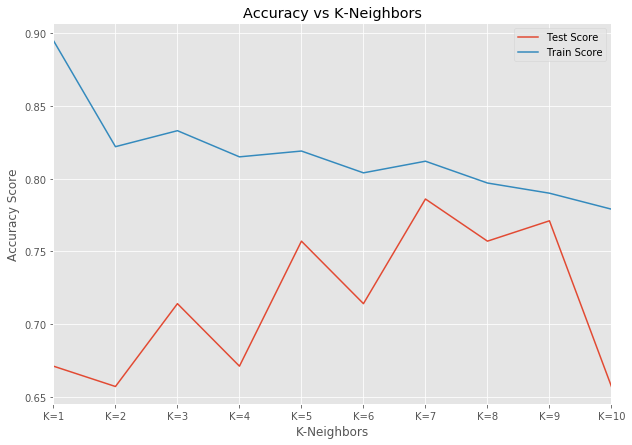

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use(['ggplot'])

#Ploteamos el gráfico
ax = K_acc[["Test Score","Train Score"]].plot(kind="line",
            linestyle="-",
            figsize=(10,7))
ax.set_xlabel("K-Neighbors")
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy vs K-Neighbors")
plt.show()

# KNeighbors con Cross-Validation
Hacer Cross-Validation es bastante aconsejable. Indicamos 5 folds y obtenemos que K=7 es el mejor

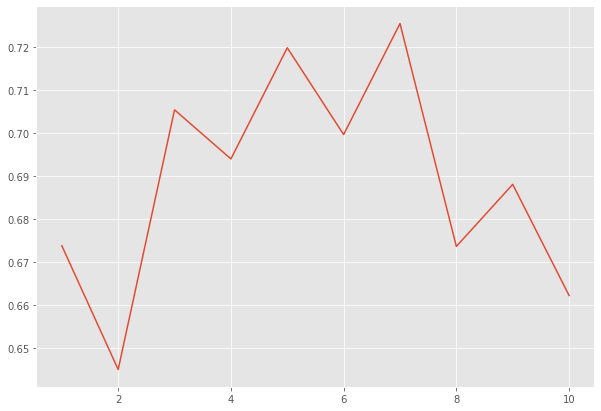

In [29]:
#Se importan las librerías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# choose k between 1 to 31
k_range = range(1, 11)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='f1_micro') #Other scoring available: f1_macro, f1_weighted, accuracy
    k_scores.append(scores.mean())

plt.figure(figsize=(10,7))
plt.plot(k_range,k_scores,)
plt.show()

### Los mejores candidatos parecen ser:
- K = 5
- K = 7

In [30]:
#Vamos a comparar sus matrices de confusion

#Predicción para K= 5
KN = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
KN.fit(norm_x_train, y_train)
y_hat_k5 = KN.predict(norm_x_test)

#Predicción para K= 7
KN = KNeighborsClassifier(n_neighbors = 7, metric="euclidean")
KN.fit(norm_x_train, y_train)
y_hat_k7 = KN.predict(norm_x_test)

print("Resultados para K=5\n")
print(confusion_matrix(y_test, y_hat_k5),"\n")
print(classification_report(y_test, y_hat_k5))

print("Resultados para K=7\n")
print(confusion_matrix(y_test, y_hat_k7),"\n")
print(classification_report(y_test, y_hat_k7))

Resultados para K=5

[[ 6  9]
 [ 8 47]] 

              precision    recall  f1-score   support

  COLLECTION       0.43      0.40      0.41        15
     PAIDOFF       0.84      0.85      0.85        55

    accuracy                           0.76        70
   macro avg       0.63      0.63      0.63        70
weighted avg       0.75      0.76      0.75        70

Resultados para K=7

[[ 6  9]
 [ 6 49]] 

              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

    accuracy                           0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



# KNeighbors escogido
Nos quedamos con **K = 7**, que parece obtener unos resultados ligeramente mejores. Sin embaro **hay bastante error clasificando la clase COLLECTION, posiblemente debido a que se encuentra desbalanceada respecto a PAIDOF**

In [31]:
KN = KNeighborsClassifier(n_neighbors = 7, metric="euclidean")
KN.fit(norm_x_train, y_train)
KN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

#Se crea un diccionario para guardar los resultados de accuracy
accuracy_DT = {}

#Rango iterativo para recorrer el bucle
DT_depth = range(1,11)

#En un Decission Tree, hubiera sido indiferente la estandarización
for k in DT_depth:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=k)
    DT.fit(norm_x_train,y_train)
    y_hat = DT.predict(norm_x_test)
    y_train_pred = DT.predict(norm_x_train)
    acc_test = accuracy_score(y_test, y_hat).round(3)
    acc_train = accuracy_score(y_train, y_train_pred).round(3)
    accuracy_DT[f"Depth={k}"] = [acc_test, acc_train]

df_acc_DT = pd.DataFrame(data = accuracy_DT).T
df_acc_DT.columns=["Test Score","Train Score"]
df_acc_DT

,Test Score,Train Score
Depth=1,0.786,0.743
Depth=2,0.786,0.743
Depth=3,0.614,0.746
Depth=4,0.614,0.746
Depth=5,0.643,0.750
Depth=6,0.771,0.775
Depth=7,0.757,0.790
Depth=8,0.757,0.797
Depth=9,0.657,0.830
Depth=10,0.700,0.837


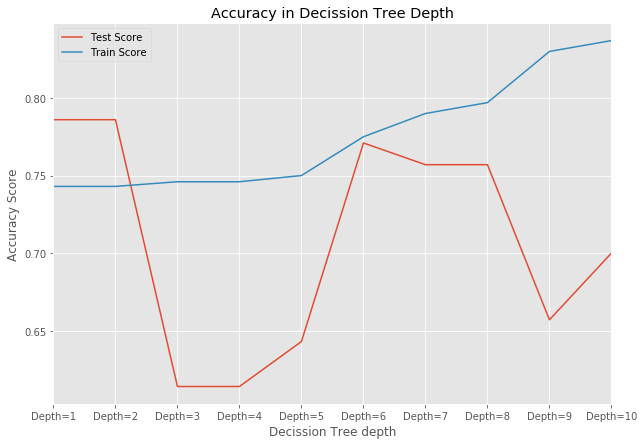

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use(['ggplot'])

#Ploteamos el gráfico
ax = df_acc_DT[["Test Score","Train Score"]].plot(kind="line",
            linestyle="-",
            figsize=(10,7))
ax.set_xlabel("Decission Tree depth")
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy in Decission Tree Depth")
plt.show()

In [34]:
#Vamos a comparar sus matrices de confusion

#Predicción para D=2
DT = DecisionTreeClassifier(criterion="entropy", max_depth=2)
DT.fit(norm_x_train,y_train)
y_hat_d2 = DT.predict(norm_x_test)

#Predicción para d=5
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)
DT.fit(norm_x_train,y_train)
y_hat_d5 = DT.predict(norm_x_test)

print("Resultados para D=2\n")
print(confusion_matrix(y_test, y_hat_d2),"\n")
print(classification_report(y_test, y_hat_d2))

print("Resultados para D=5\n")
print(confusion_matrix(y_test, y_hat_d5),"\n")
print(classification_report(y_test, y_hat_d5))

Resultados para D=2

[[ 0 15]
 [ 0 55]] 

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Resultados para D=5

[[10  5]
 [20 35]] 

              precision    recall  f1-score   support

  COLLECTION       0.33      0.67      0.44        15
     PAIDOFF       0.88      0.64      0.74        55

    accuracy                           0.64        70
   macro avg       0.60      0.65      0.59        70
weighted avg       0.76      0.64      0.67        70



C:\Users\Jota_Moreno\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
DT.fit(norm_x_train, y_train)
DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Support Vector Machine

In [36]:
from sklearn import svm

kernel = ["rbf", "linear", "poly", "sigmoid"]

accuracy_SVM={}

for i in range(len(kernel)):
    clf = svm.SVC(kernel=kernel[i])
    clf.fit(norm_x_train, y_train) 
    y_hat = clf.predict(norm_x_test)
    y_train_pred = clf.predict(norm_x_train)
    acc_test = accuracy_score(y_test, y_hat)
    acc_train = accuracy_score(y_train, y_train_pred)
    accuracy_SVM[f"{kernel[i]}"] = [acc_test, acc_train]

df_svm = pd.DataFrame(data = accuracy_SVM).T
df_svm.columns=["Test Score","Train Score"]
df_svm

,Test Score,Train Score
rbf,0.742857,0.782609
linear,0.785714,0.742754
poly,0.771429,0.782609
sigmoid,0.742857,0.710145


## Nos quedamos con SVC rbf

In [37]:
SVC = svm.SVC(kernel="rbf")
SVC.fit(norm_x_train, y_train) 
SVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

C = [0.001, 0.01, 0.1, 0.1, 0.5, 1]
solver= ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

accuracy_LR={}

for i in range(len(solver)):
    for k in range(len(C)):
        LR = LogisticRegression(C=C[k], solver=solver[i],)
        LR.fit(norm_x_train, y_train)
        y_hat = LR.predict(norm_x_test)
        y_hat_prob = LR.predict(norm_x_test)
        y_train_pred = LR.predict(norm_x_train)
        acc_test = accuracy_score(y_test, y_hat)
        acc_train = accuracy_score(y_train, y_train_pred)
        accuracy_LR[f"{solver[i]} - {C[k]}"] = [acc_test, acc_train]

df_log = pd.DataFrame(data = accuracy_LR).T
df_log.columns=["Test Score","Train Score"]
df_log

,Test Score,Train Score
liblinear - 0.001,0.671429,0.750000
liblinear - 0.01,0.685714,0.757246
liblinear - 0.1,0.742857,0.764493
liblinear - 0.5,0.728571,0.764493
liblinear - 1,0.714286,0.764493
newton-cg - 0.001,0.785714,0.742754
newton-cg - 0.01,0.785714,0.742754
newton-cg - 0.1,0.771429,0.753623
newton-cg - 0.5,0.742857,0.757246
newton-cg - 1,0.728571,0.771739


#### Seleccionamos LR con Newton-cg y C=0.01

In [39]:
LR = LogisticRegression(C=0.01, solver="liblinear",)
LR.fit(norm_x_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation using Test set

In [40]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [41]:
import wget

URL = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"

file = wget.download(URL)

100% [................................................................................] 3642 / 3642

### Load Test set for evaluation 

In [42]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [43]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)

X_loan_test = test_feature
y_loan_test = test_df['loan_status'].values

X_loan_test = preprocessing.StandardScaler().fit_transform(X_loan_test)

print (X_loan_test.shape)
print (y_loan_test.shape)

(54, 8)
(54,)


In [44]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss



In [45]:
print("KN Jaccard Score:", jaccard_similarity_score(y_loan_test, KN.predict(X_loan_test)))
print("DT Jaccard Score:", jaccard_similarity_score(y_loan_test, DT.predict(X_loan_test)))
print("SVC Jaccard Score:", jaccard_similarity_score(y_loan_test, SVC.predict(X_loan_test)))
print("LR Jaccard Score:", jaccard_similarity_score(y_loan_test, LR.predict(X_loan_test)))
print("KN F1_Score",f1_score(y_loan_test, KN.predict(X_loan_test), average='weighted'))
print("DT F1_Score",f1_score(y_loan_test, DT.predict(X_loan_test), average='weighted'))
print("SVC F1_Score",f1_score(y_loan_test, SVC.predict(X_loan_test), average='weighted'))
print("LR F1_Score",f1_score(y_loan_test, LR.predict(X_loan_test), average='weighted'))
print("LR Log_Loss",log_loss(y_loan_test, LR.predict_proba(X_loan_test)))

KN Jaccard Score: 0.6666666666666666
DT Jaccard Score: 0.7407407407407407
SVC Jaccard Score: 0.7962962962962963
LR Jaccard Score: 0.7407407407407407
KN F1_Score 0.6328400281888654
DT F1_Score 0.7006734006734008
SVC F1_Score 0.7583503077293734
LR F1_Score 0.6604267310789049
LR Log_Loss 0.5672153379912981


C:\Users\Jota_Moreno\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Jota_Moreno\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Jota_Moreno\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Jota_Moren

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.704       | 0.674        | NA      |
| Decision Tree      | 0.722       | 0.670        | NA      |
| SVM                | 0.722       | 0.649        | NA      |
| LogisticRegression | 0.815       | 0.773        | 0.564       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>